**Import tools for analysis & visualization**

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

**Import primary Canadian immigration dataset using pandas**

In [38]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read and inserted into dataframe')

Data read and inserted into dataframe


**Display first 3 rows of dataframe**

In [29]:
df_can.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


**Remove and rename columns for clarity**

In [39]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [40]:
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


**Explore the data to see immigration from Northern Africa**

In [41]:
df_can[(df_can['Continent']=='Africa') & (df_can['Region']=='Northern Africa')]

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
55,Egypt,Africa,Northern Africa,Developing regions,612,660,755,455,447,348,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165
99,Libya,Africa,Northern Africa,Developing regions,5,7,9,24,10,31,...,196,196,281,198,306,282,384,352,299,255
116,Morocco,Africa,Northern Africa,Developing regions,325,471,447,335,248,328,...,3686,2939,3322,4021,4226,5532,6242,4399,3878,3261
164,Sudan,Africa,Northern Africa,Developing regions,20,12,11,7,23,32,...,1823,1310,1039,683,622,422,612,531,444,343
176,Tunisia,Africa,Northern Africa,Developing regions,58,51,55,46,51,57,...,764,756,1065,869,950,1195,1299,1442,1503,1627
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**Convert the data for further analysis**
* Add a total column
* Index the table by the values in the "Country" column (in place of row #)

In [42]:
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.index.name = None
df_can[['Total', 1980, 1981, 1982, 1983, 1984, 1985]]

,Total,1980,1981,1982,1983,1984,1985
Afghanistan,58639,16,39,39,47,71,340
Albania,15699,1,0,0,0,0,0
Algeria,69439,80,67,71,69,63,44
American Samoa,6,0,1,0,0,0,0
Andorra,15,0,0,0,0,0,0
...,...,...,...,...,...,...,...
Viet Nam,97146,1191,1829,2162,3404,7583,5907
Western Sahara,2,0,0,0,0,0,0
Yemen,2985,1,2,1,6,0,18
Zambia,1677,11,17,11,7,16,9


**Show the immigration data for Algeria**

In [43]:
print(df_can.loc['Algeria'])

Continent                Africa
Region          Northern Africa
DevName      Developing regions
1980                         80
1981                         67
1982                         71
1983                         69
1984                         63
1985                         44
1986                         69
1987                        132
1988                        242
1989                        434
1990                        491
1991                        872
1992                        795
1993                        717
1994                        595
1995                       1106
1996                       2054
1997                       1842
1998                       2292
1999                       2389
2000                       2867
2001                       3418
2002                       3406
2003                       3072
2004                       3616
2005                       3626
2006                       4807
2007                       3623
2008    

**Show the immigration data for Algeria for 2008**

In [46]:
print(df_can.loc['Algeria', 2008])

4005


**For less confusion, convert column names (currently numbers) to strings**

In [48]:
df_can.columns = list(map(str, df_can.columns))

**Create a new dataset to show immigration data for Algeria, across all available years**

In [58]:
years = list(map(str, range(1980, 2014)))
Algeria = df_can.loc['Algeria', years]
Algeria.head(3)

1980    80
1981    67
1982    71
Name: Algeria, dtype: object

**Plot the immigration data for Algeria on a chart**

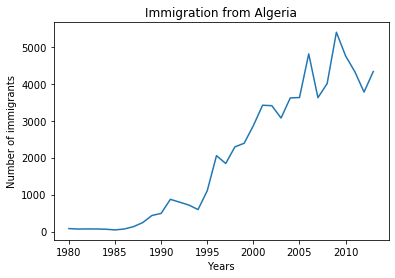

In [61]:
Algeria.plot(kind='line')

plt.title('Immigration from Algeria')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

**Let us compare Algeria with another country, say Australia**

In [80]:
df_aa = df_can.loc[['Algeria','Australia'], years]
df_aa

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
Australia,702,639,484,317,317,319,356,467,410,553,...,930,909,875,1033,1018,1018,933,851,982,1121


**Now let us see these differences on a chart**

In [81]:
#first the data must be rearranged for proper plotting
df_aa = df_aa.transpose()

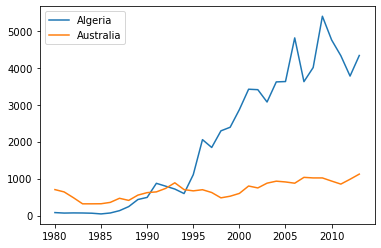

In [82]:
df_aa.plot(kind='line')

**This does not show a fair comparison. To do that let us compare immigration across the countries with the top five immigration totals**

**Identify the top five countries**
* First we will sort by total
* Next we will extract the top five countries

In [90]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


**Now that we have our five countries, let us extract the data**

In [91]:
df_top5 = df_can.loc[['India','China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan'], years]
df_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


**The data must be rearranged for proper plotting**

In [93]:
df_top5 = df_top5.transpose()

**Finally, we can see a comparison**

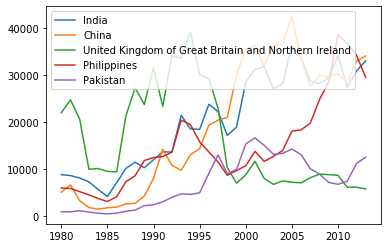

In [100]:
df_top5.plot(kind='line')

**From the above we can see that the UK was responsible for the majority of the immigration until a sharp decrease in the late 1990's. Around this same time immigration from both China and India increased, becoming the main sources.**
**In the late 2000's we can see a spike in immigration from the Phillippines, to a similar level as that of China and India.**